<a href="https://colab.research.google.com/github/souadg/CAS-ADS-Project2/blob/main/M2_Project_Elias_Souad_v2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 2 Project Work



## Load the data set

In [21]:
# Import libraries
import pandas as pd
from google.colab import files
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats


In [22]:
pd.set_option('display.max_rows', 100) #Display more rows than the defaul value of 5

In [25]:
# Load a file from local drive
uploaded = files.upload()

Saving StudentsPerformance.csv to StudentsPerformance (2).csv


In [26]:
# Read comma separated value file
df = pd.read_csv('StudentsPerformance.csv')

In [27]:
# Rename the columns to make them more easier to process for Python
df.columns = ['gender', 'race_ethn', 'parental_ed', 'lunch', 'test_prep', 'math_score', 'reading_score', 'writing_score']
df.head()

,gender,race_ethn,parental_ed,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
df.tail()

In [35]:
# Types of variables, number of rows, columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         1000 non-null   object
 1   race_ethn      1000 non-null   object
 2   parental_ed    1000 non-null   object
 3   lunch          1000 non-null   object
 4   test_prep      1000 non-null   object
 5   math_score     1000 non-null   int64 
 6   reading_score  1000 non-null   int64 
 7   writing_score  1000 non-null   int64 
 8   parent_uni     1000 non-null   object
dtypes: int64(3), object(6)
memory usage: 70.4+ KB


## Descriptive statistics


In [34]:
# Get general information on descriptive statistics
df.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


An idea would be to consolidate the parental education background into two categories: 

- up to and including high school
- university

[Associate's degree](https://en.wikipedia.org/wiki/Associate_degree) is obtained after graduating from high school.

In [ ]:
# List of values for high school
lst_hs = ['some high school', 'high school']
df.loc[df['parental_ed'].isin(lst_hs), 'parent_uni'] = "no_university"

# Complement of high school list
df.loc[~df['parental_ed'].isin(lst_hs), 'parent_uni'] = "university"
df.head(10)

We can use histogrammes to see how the exam scores differ for a categorical variable such as gender. (Similar histogrammes could be generated for lunch, race, parental level of education, and test preparation course.) 

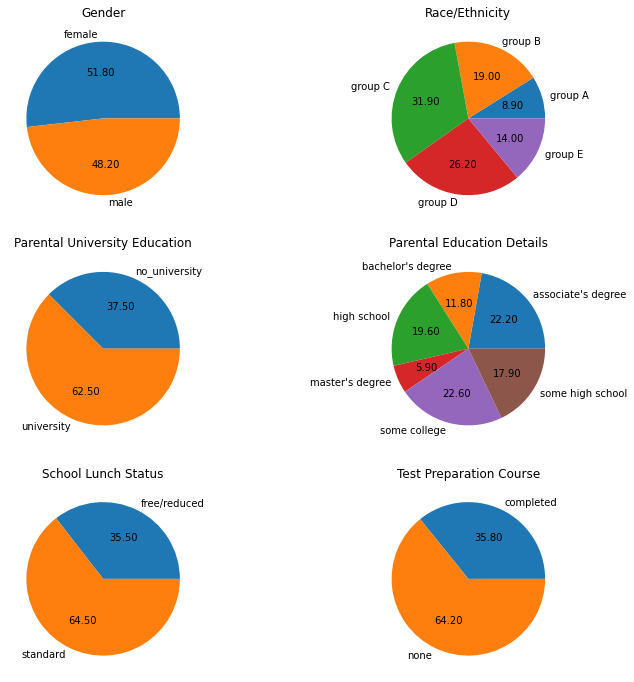

In [46]:
plt.figure(figsize=(12, 12))
plt.subplot(321)
ax1 = df.groupby('gender').size().plot(kind = 'pie', autopct = '%.2f')
ax1.title.set_text("Gender")
plt.ylabel("")
plt.subplot(322)
ax2 = df.groupby('race_ethn').size().plot(kind = "pie", autopct = "%.2f")
ax2.title.set_text("Race/Ethnicity")
plt.ylabel("")
plt.subplot(323)
ax3 = df.groupby('parent_uni').size().plot(kind = "pie", autopct = "%.2f")
ax3.title.set_text("Parental University Education")
plt.ylabel("")
plt.subplot(324)
ax4 = df.groupby('parental_ed').size().plot(kind = "pie", autopct = "%.2f")
ax4.title.set_text("Parental Education Details")
plt.ylabel("")
plt.subplot(325)
ax5 = df.groupby('lunch').size().plot(kind = "pie", autopct = "%.2f")
ax5.title.set_text("School Lunch Status")
plt.ylabel("")
plt.subplot(326)
ax6 = df.groupby('test_prep').size().plot(kind = "pie", autopct = "%.2f")
ax6.title.set_text("Test Preparation Course")
plt.ylabel("")
plt.show()

We can compare test scores by gender.

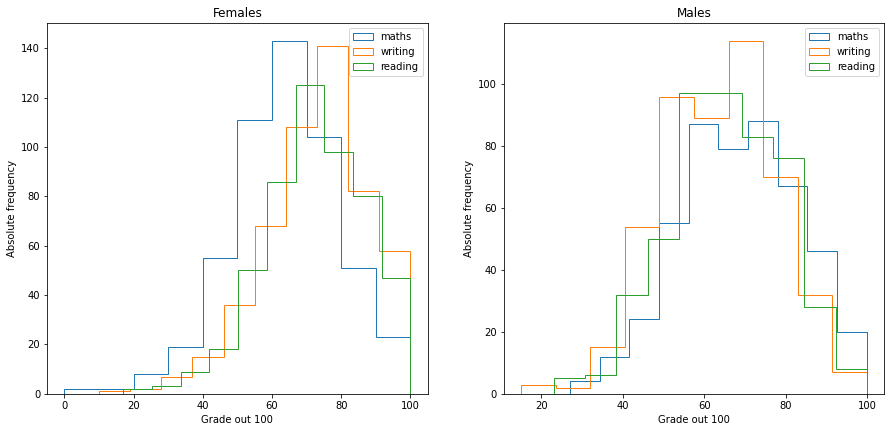

In [47]:
# Filter data frame by gender
df_female = df[df['gender']=='female']
df_male = df[df['gender']=='male']

# Plot female scores
plt.figure(figsize=(15, 15))
plt.subplot(221)
df_female['math_score'].plot(kind="hist", fill= False,histtype='step',title = 'Females', label = 'maths')
df_female['writing_score'].plot(kind="hist", fill= False,histtype='step',title = 'Females', label = 'writing')
ax = df_female['reading_score'].plot(kind="hist", fill= False, histtype='step', label="reading")
ax.set_xlabel('Grade out 100')
ax.set_ylabel('Absolute frequency')
plt.legend()

# Plot male scores
plt.subplot(222)
df_male['math_score'].plot(kind="hist", fill= False,histtype='step',title = 'Males', label = 'maths')
df_male['writing_score'].plot(kind="hist", fill= False,histtype='step',title = 'Males', label = 'writing')
ax = df_male['reading_score'].plot(kind="hist", fill= False, histtype='step', label="reading")
ax.set_xlabel('Grade out 100')
ax.set_ylabel('Absolute frequency')
plt.legend()

plt.show()

## Hypothesis testing
Our **working hypothesis** is that **males have higher maths scores than females**.

Our **null hypothesis** is that **males have lower maths scores than females or equal**.

The present working hypothesis is suggested among other things by the mean of male and female math scores:

In [48]:
print("Mean maths scores are %1.2f for females and %1.2f for males" %(df_female["math_score"].mean(), df_male["math_score"].mean()))

Mean maths scores are 63.63 for females and 68.73 for males


To get a general idea on the scores, we compare first the mean for the maths scores of males and females:

In [49]:
df_female['math_score'].describe()


count    518.000000
mean      63.633205
std       15.491453
min        0.000000
25%       54.000000
50%       65.000000
75%       74.000000
max      100.000000
Name: math_score, dtype: float64

In [50]:
df_male['math_score'].describe()

count    482.000000
mean      68.728216
std       14.356277
min       27.000000
25%       59.000000
50%       69.000000
75%       79.000000
max      100.000000
Name: math_score, dtype: float64

### Testing for normal distribution

Some statistical tests assume that the samples to be tested come from a normal distribution. To be able to choose the appropriate tests, we must thus first check if our samples come from a normal distribution. We can test for normality  using a qq-plot or a normality test.

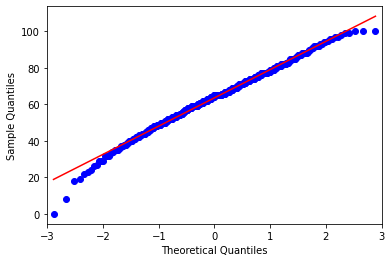

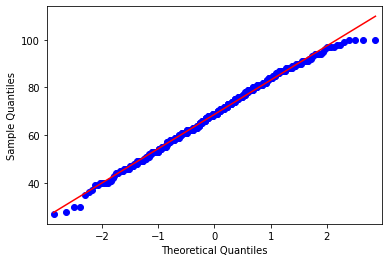

In [51]:
# QQ-Plot
# TODO: Add titles and put in one figure
# Female maths score
sm.qqplot(df_female['math_score'], line='s')
# Male maths score
sm.qqplot(df_male['math_score'], line='s')
plt.show()

The null hypothesis of the D'Agostino-Pearson test is normal distribution. If the resulting *p*-value is larger than 0.001 we cannot reject the normality of the distribution.

**Question**: should we pick a different value for $\alpha$?

**Answer (Elias)**: $\alpha$ is in the end an arbitrarily chosen value, but see the addition below.

**Answer (Souad)**: Actually I checked the literature,  most tests use a $\alpha = 0.05$. This means that both Pearson and Shapiro reject the null hypotesis, i.e. reject normality.

In [56]:
# Normality test female maths score
# D Agostino-Pearson. The method returns the test statistic value and the p-value
k2, p = stats.normaltest(df_female['math_score']) 
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ', alpha)
print('p = ', p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("We can reject the null hypothesis of normality of female maths score")
else:
  print("We cannot reject the null hypothesis of normality of female maths score")

Alpha =  0.05
p =  0.0007002831165387053
We can reject the null hypothesis of normality of female maths score


In [57]:
# Normality test male maths score
k2, p = stats.normaltest(df_male['math_score']) 
alpha = 0.05 # Rejection criterion defined by you
print('Alpha = ', alpha)
print('p = ', p)
if p < alpha:  # null hypothesis: x comes from a normal distribution
     print("We can reject the null hypothesis of normality of male maths score")
else:
  print("We cannot reject the null hypothesis of normality of male maths score")

Alpha =  0.05
p =  0.06459355656271938
We cannot reject the null hypothesis of normality of male maths score


It looks like the normality assumption for the female maths score does not hold.


Note, however, also the *p*-values for both samples in question retrieved from the Shapiro-Wilk test for normality (this test can be used for samples between 3 $\leq$ n $\leq$ 5000): 

In [60]:
s,p = stats.shapiro(df_female['math_score'])
print('Test statistic = %.2f, p-value = %.2e' %(s, p))

Test statistic = 0.99, p-value = 3.52e-03


In [65]:
s,p = stats.shapiro(df_male['math_score'])
print('Test statistic = %.2f, p-value = %.2e' %(s, p))

Test statistic = 0.99, p-value = 3.80e-02


These *p*-values suggest that the normality assumptions do not hold for neither males nor females.



### Mann-Whitney U test
It appears that the most apporpriate test is the Mann-Whitney U test for two independent samples, non-normally distributed.

Note that this test should only be used with at least 20 data points.


In [66]:
df_female['math_score'].size

518

In [67]:
df_male['math_score'].size

482

In [68]:
t, p = stats.mannwhitneyu(df_male['math_score'],df_female['math_score'], alternative='greater')
print("The p-value of the Mann-Whitney U test is %1.2e" %p)

The p-value of the Mann-Whitney U test is 2.14e-07


The *p*-value is $2.14 \times 10^{-7}$, therefore we can reject the null hypothesis: it is very unlikely that male maths scores are lower than female maths scores or equal. 

Did you write this **Elias**? 

*Thus, our working hypothesis (alternative hypothesis) is confirmed that the math scores of male students are higher than those of female students.*

A hypothesis test does **not** confirm the working hypothesis. It merely allows us to reject the null hypothesis.